# Implementing a Simple ChatBot using LLM

In [1]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END

#Reducers
from typing import Annotated
from langgraph.graph.message import add_messages


In [2]:
class State(TypedDict):
    messages : Annotated[list,add_messages]
    # It can be used to append the each messages i.e ai or Human message in the form of List

In [4]:
import os
from dotenv import load_dotenv
load_dotenv()


True

### Import the LLM Model

In [5]:
from langchain_groq import ChatGroq

groq_llm = ChatGroq(model="llama-3.1-8b-instant")



### Creating a Node

In [7]:
def superbot(state:State):
    print("Super Bot is Called Successfully")
    return {"messages":[groq_llm.invoke(state["messages"])]}

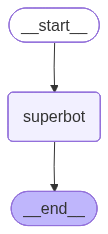

In [8]:
from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END
# Build a Graph

graph = StateGraph(State)

# Add Nodes 
graph.add_node("superbot",superbot)

#Add Edges
graph.add_edge(START,"superbot")
graph.add_edge("superbot",END)

#Complie The Graph

graph_builder = graph.compile()

display(Image(graph_builder.get_graph().draw_mermaid_png()))



In [ ]:
#Invocation Method

graph_builder.invoke({"messages":"Which religion you have belongs?"})

Super Bot is Called Successfully


Failed to multipart ingest runs: langsmith.utils.LangSmithError: Failed to POST https://api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')
Failed to multipart ingest runs: langsmith.utils.LangSmithError: Failed to POST https://api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')


{'messages': [HumanMessage(content='Which religion you have belongs?', additional_kwargs={}, response_metadata={}, id='89f9b12f-e2c0-4c67-82d5-1b69bed914cd'),
  AIMessage(content="I'm a large language model, I don't have a personal religion or belief system. My purpose is to provide information and answer questions to the best of my knowledge based on my training data, without promoting or endorsing any particular religion or ideology. I can provide information about various religions and their beliefs, practices, and traditions if that's what you're looking for.", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 74, 'prompt_tokens': 41, 'total_tokens': 115, 'completion_time': 0.126194182, 'completion_tokens_details': None, 'prompt_time': 0.001945685, 'prompt_tokens_details': None, 'queue_time': 0.051618075, 'total_time': 0.128139867}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_4387d3edbb', 'service_tier': 'on_demand', 'finish_reason': 

Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')
Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')


In [10]:
# Perfrom Streaming
for event in graph_builder.stream({"messages":"Explain Delhi Pollution"}):
    print(event)

Super Bot is Called Successfully


Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')


{'superbot': {'messages': [AIMessage(content="Delhi pollution refers to the severe air quality issues faced by the city of Delhi, the capital of India. The problem is caused by a combination of factors, including:\n\n1. **Industrial emissions**: Delhi has a large number of industries, including those that produce cement, steel, and other products, which release harmful pollutants into the air.\n2. **Vehicle emissions**: Delhi has a large number of vehicles, including cars, buses, and trucks, which emit pollutants such as particulate matter (PM), nitrogen oxides (NOx), and volatile organic compounds (VOCs).\n3. **Crop burning**: During the post-harvest season, farmers in nearby states such as Punjab and Haryana burn crops to clear the land, releasing large amounts of pollutants into the air.\n4. **Construction activities**: Delhi is a rapidly growing city, and construction activities are ongoing throughout the year, releasing dust and other pollutants into the air.\n5. **Population grow

Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')


In [11]:
#Using Stream Mode
# Perfrom Streaming
for event in graph_builder.stream({"messages":"Explain Delhi Pollution"},stream_mode="values"):
    print(event)

{'messages': [HumanMessage(content='Explain Delhi Pollution', additional_kwargs={}, response_metadata={}, id='6ab51e04-60f9-48e6-9c0e-819ce73ca55b')]}
Super Bot is Called Successfully


Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')


{'messages': [HumanMessage(content='Explain Delhi Pollution', additional_kwargs={}, response_metadata={}, id='6ab51e04-60f9-48e6-9c0e-819ce73ca55b'), AIMessage(content='Delhi pollution, also known as the "Great Smog of Delhi," is a severe air pollution crisis that affects the city of Delhi and its surrounding areas in northern India. The pollution is caused by a combination of factors, including:\n\n1. **Vehicular emissions**: The rapid growth of the city\'s population and the increasing number of vehicles on the road have led to a significant increase in air pollution.\n2. **Industrial activities**: The presence of many industries, such as power plants, steel mills, and brick kilns, in and around Delhi contributes to air pollution.\n3. **Crop burning**: The burning of crop residue in neighboring states, such as Punjab and Haryana, releases large amounts of particulate matter (PM) into the air.\n4. **Waste burning**: The open burning of trash and waste in the city and its surroundings 

Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')
